In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("laptop_data.csv")

In [3]:
print(df.head())
print("")
print("<---------------------------------------------------------------------------------------------->")
print("")
print("")
print(df.info())
print("")
print("<---------------------------------------------------------------------------------------------->")
print("")
print("")
print(df.isnull().sum())
print("")
print("<---------------------------------------------------------------------------------------------->")
print("")
print(df.describe())

   Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  m

In [4]:
field_descriptions = {
    "Unnamed: 0": "Satır ID (otomatik oluşturulmuş)",
    "Company": "Laptop üretici firması",
    "TypeName": "Laptop türü",
    "Inches": "Ekran boyutu (inç cinsinden)",
    "ScreenResolution": "Ekran çözünürlüğü",
    "Cpu": "İşlemci bilgisi",
    "Ram": "RAM kapasitesi",
    "Memory": "Depolama türü ve kapasitesi",
    "Gpu": "Grafik işlemcisi",
    "OpSys": "İşletim sistemi",
    "Weight": "Ağırlık",
    "Price": "Fiyat"
}
field_df = pd.DataFrame(list(field_descriptions.items()), columns=["Sütun İsmi", "Açıklama"])
print(field_df)


          Sütun İsmi                          Açıklama
0         Unnamed: 0  Satır ID (otomatik oluşturulmuş)
1            Company            Laptop üretici firması
2           TypeName                       Laptop türü
3             Inches      Ekran boyutu (inç cinsinden)
4   ScreenResolution                 Ekran çözünürlüğü
5                Cpu                   İşlemci bilgisi
6                Ram                    RAM kapasitesi
7             Memory       Depolama türü ve kapasitesi
8                Gpu                  Grafik işlemcisi
9              OpSys                   İşletim sistemi
10            Weight                           Ağırlık
11             Price                             Fiyat


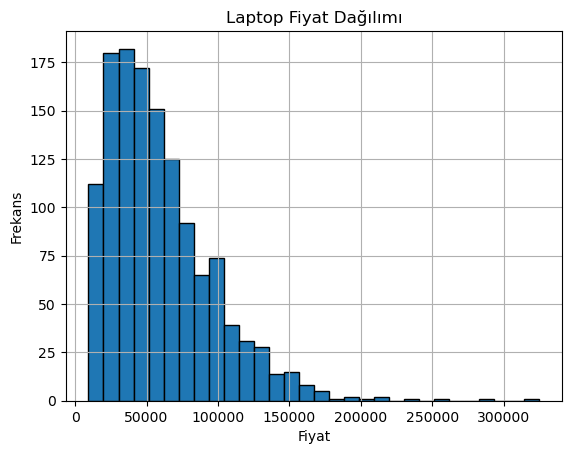

In [5]:
df["Price"].hist(bins=30, edgecolor="black")
plt.title("Laptop Fiyat Dağılımı")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")
plt.show()

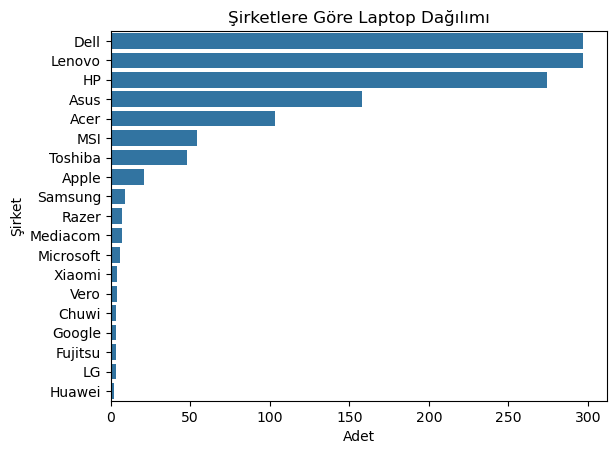

In [6]:
sns.countplot(data=df, y="Company", order=df["Company"].value_counts().index)
plt.title("Şirketlere Göre Laptop Dağılımı")
plt.xlabel("Adet")
plt.ylabel("Şirket")
plt.show()

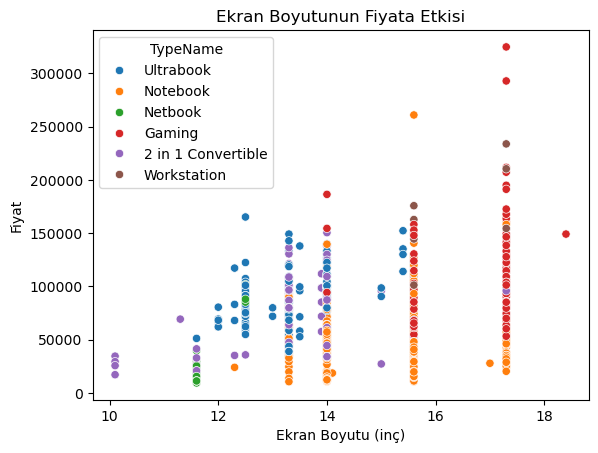

In [7]:
sns.scatterplot(data=df, x="Inches", y="Price", hue="TypeName")
plt.title("Ekran Boyutunun Fiyata Etkisi")
plt.xlabel("Ekran Boyutu (inç)")
plt.ylabel("Fiyat")
plt.show()

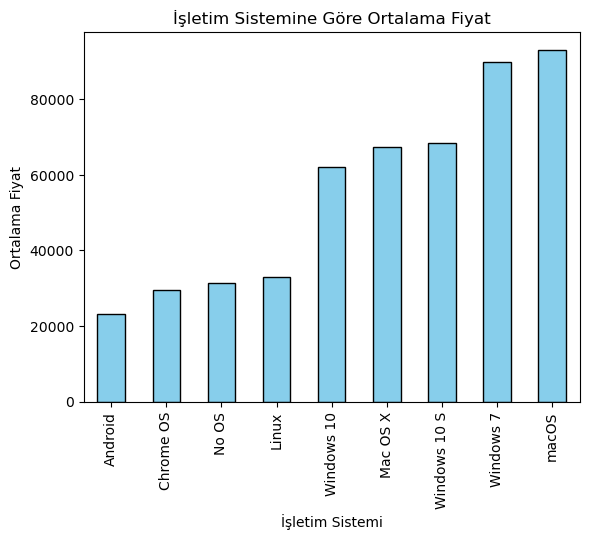

In [8]:
avg_price_per_os = df.groupby("OpSys")["Price"].mean().sort_values()
avg_price_per_os.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("İşletim Sistemine Göre Ortalama Fiyat")
plt.xlabel("İşletim Sistemi")
plt.ylabel("Ortalama Fiyat")
plt.show()

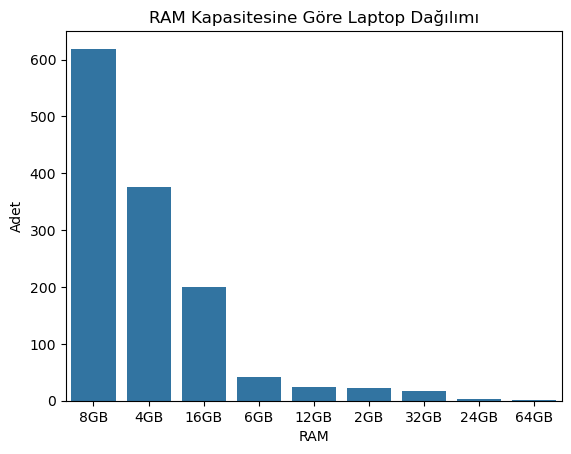

In [9]:
sns.countplot(data=df, x="Ram", order=df["Ram"].value_counts().index)
plt.title("RAM Kapasitesine Göre Laptop Dağılımı")
plt.xlabel("RAM")
plt.ylabel("Adet")
plt.show()

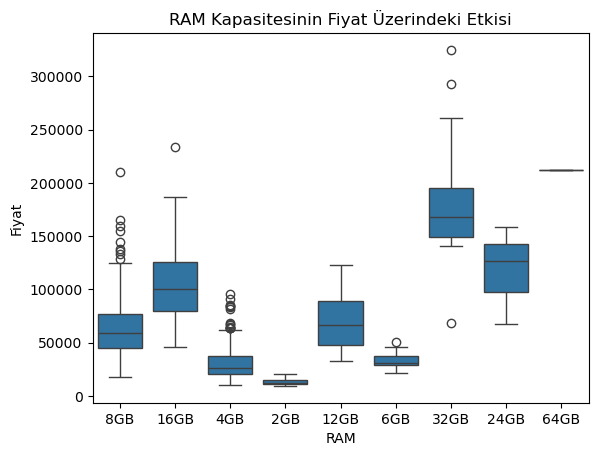

In [10]:
sns.boxplot(data=df, x="Ram", y="Price")
plt.title("RAM Kapasitesinin Fiyat Üzerindeki Etkisi")
plt.xlabel("RAM")
plt.ylabel("Fiyat")
plt.show()

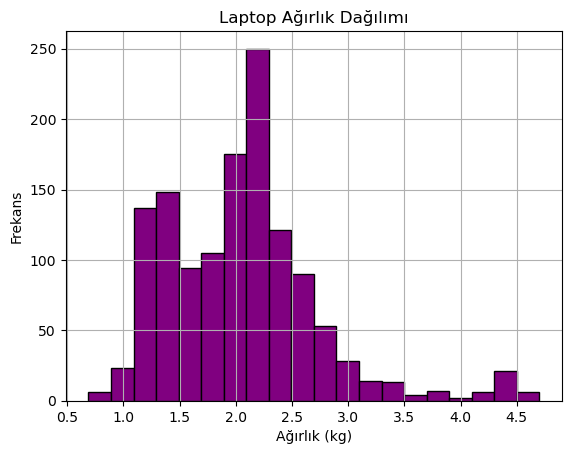

In [11]:
df["Weight"] = df["Weight"].str.replace("kg", "").astype(float)  # Ağırlık sütununu temizle
df["Weight"].hist(bins=20, edgecolor="black", color="purple")
plt.title("Laptop Ağırlık Dağılımı")
plt.xlabel("Ağırlık (kg)")
plt.ylabel("Frekans")
plt.show()

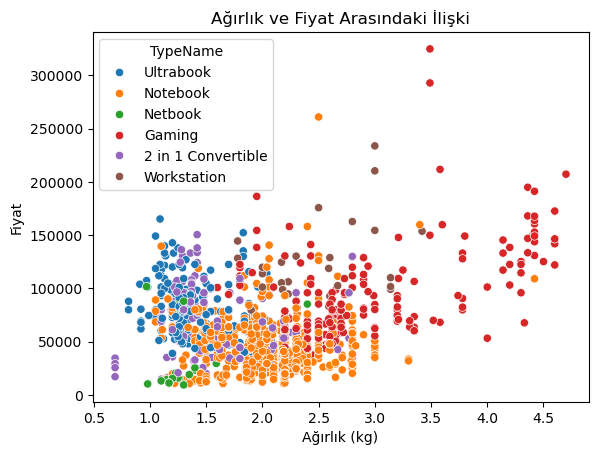

In [12]:
sns.scatterplot(data=df, x="Weight", y="Price", hue="TypeName")
plt.title("Ağırlık ve Fiyat Arasındaki İlişki")
plt.xlabel("Ağırlık (kg)")
plt.ylabel("Fiyat")
plt.show()

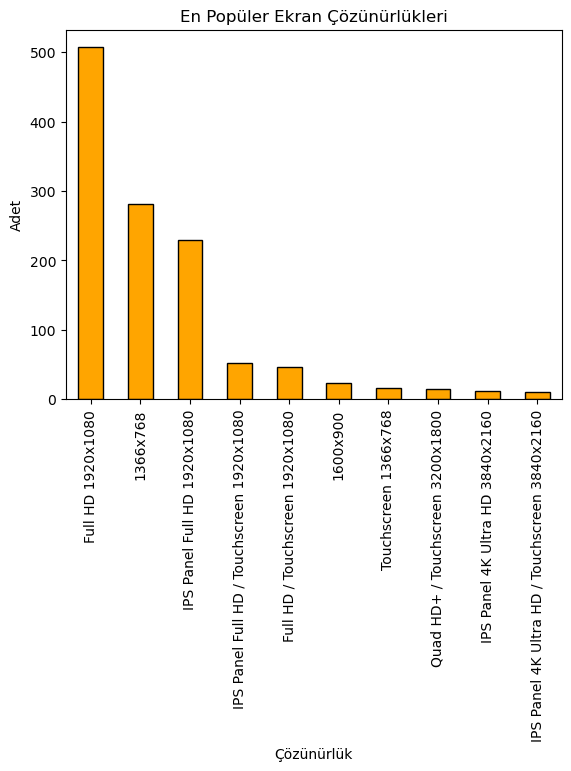

In [13]:
resolution_counts = df["ScreenResolution"].value_counts().head(10)
resolution_counts.plot(kind="bar", color="orange", edgecolor="black")
plt.title("En Popüler Ekran Çözünürlükleri")
plt.xlabel("Çözünürlük")
plt.ylabel("Adet")
plt.xticks(rotation=90)
plt.show()

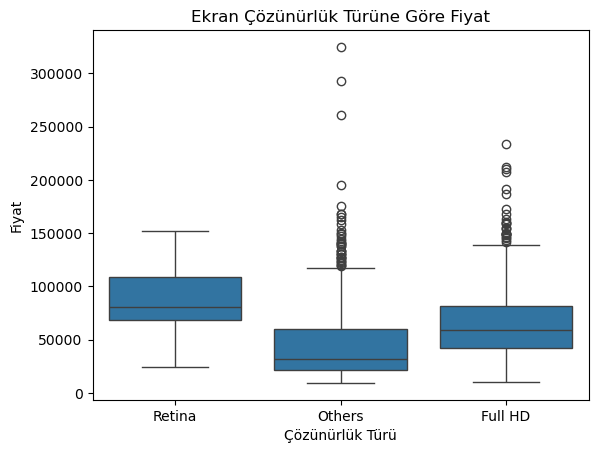

In [14]:
df["Resolution_Type"] = df["ScreenResolution"].apply(lambda x: "Retina" if "Retina" in x else "Full HD" if "1920x1080" in x else "Others")
sns.boxplot(data=df, x="Resolution_Type", y="Price")
plt.title("Ekran Çözünürlük Türüne Göre Fiyat")
plt.xlabel("Çözünürlük Türü")
plt.ylabel("Fiyat")
plt.show()

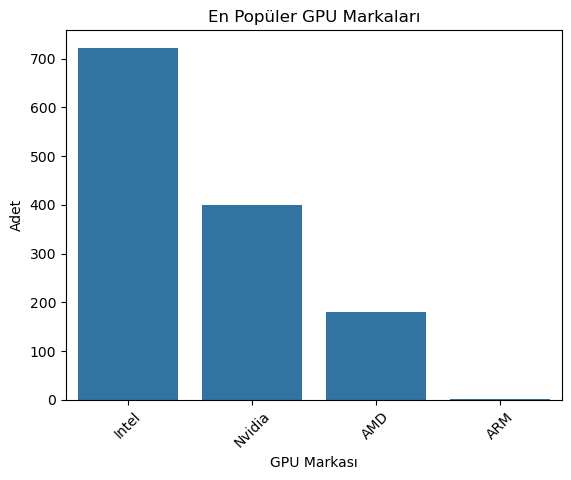

In [15]:
df["Gpu_Brand"] = df["Gpu"].apply(lambda x: x.split()[0])  # İlk kelime genellikle marka
sns.countplot(data=df, x="Gpu_Brand", order=df["Gpu_Brand"].value_counts().index[:10])
plt.title("En Popüler GPU Markaları")
plt.xlabel("GPU Markası")
plt.ylabel("Adet")
plt.xticks(rotation=45)
plt.show()

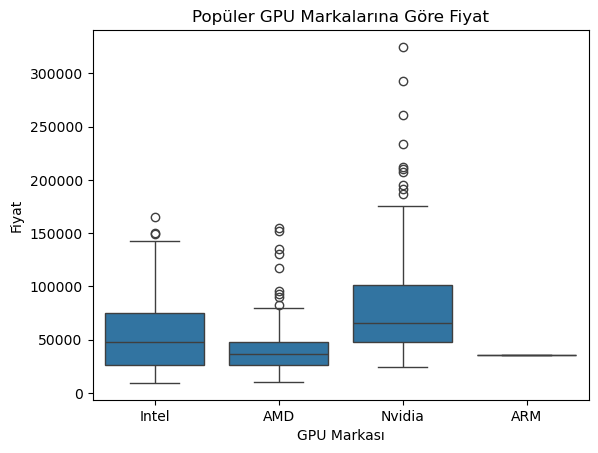

In [16]:
top_gpu_brands = df["Gpu_Brand"].value_counts().index[:5]  # En popüler 5 GPU markası
sns.boxplot(data=df[df["Gpu_Brand"].isin(top_gpu_brands)], x="Gpu_Brand", y="Price")
plt.title("Popüler GPU Markalarına Göre Fiyat")
plt.xlabel("GPU Markası")
plt.ylabel("Fiyat")
plt.show()

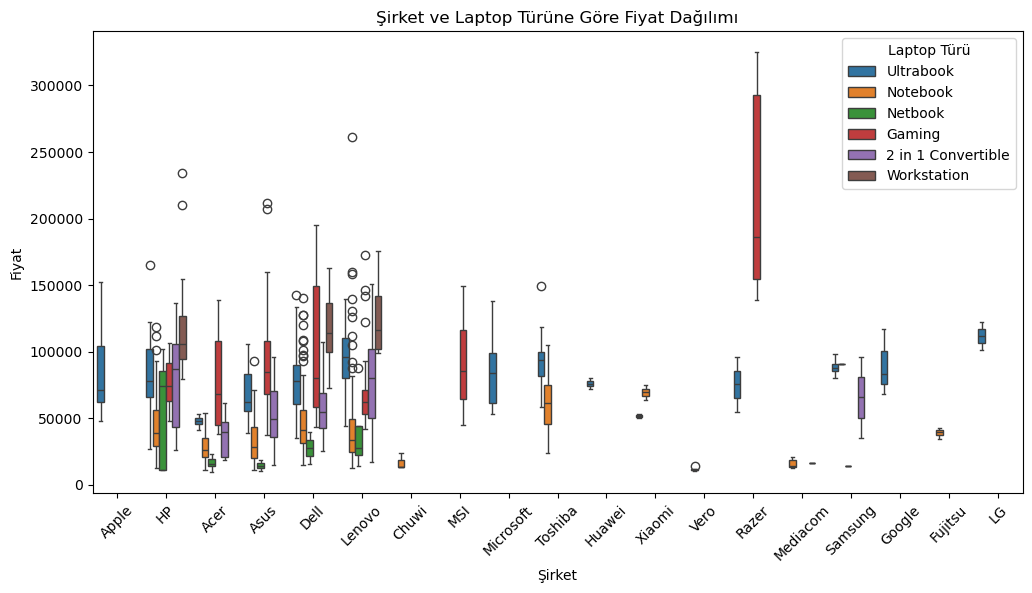

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Company", y="Price", hue="TypeName")
plt.title("Şirket ve Laptop Türüne Göre Fiyat Dağılımı")
plt.xlabel("Şirket")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.legend(title="Laptop Türü")
plt.show()

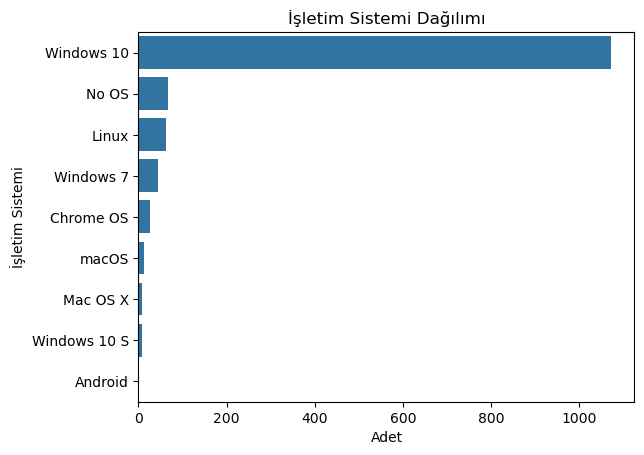

In [18]:
sns.countplot(data=df, y="OpSys", order=df["OpSys"].value_counts().index)
plt.title("İşletim Sistemi Dağılımı")
plt.xlabel("Adet")
plt.ylabel("İşletim Sistemi")
plt.show()

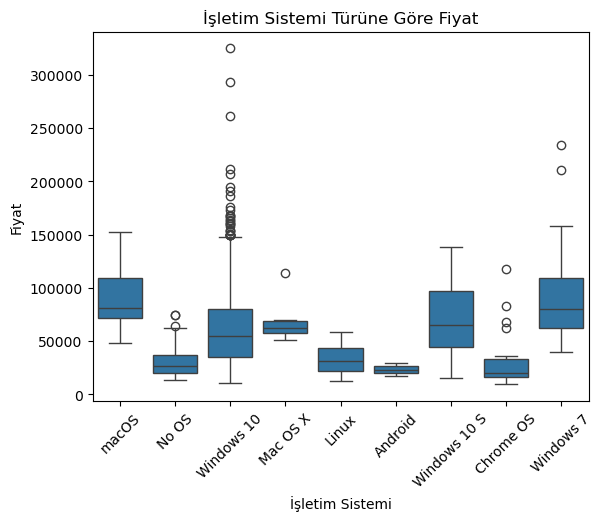

In [19]:
sns.boxplot(data=df, x="OpSys", y="Price")
plt.title("İşletim Sistemi Türüne Göre Fiyat")
plt.xlabel("İşletim Sistemi")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.show()

In [20]:
print(df.describe(include='all'))
print("")
print("<---------------------------------------------------------------------------------------------->")
print("")

print(df.info())
print("")
print("<---------------------------------------------------------------------------------------------->")
print("")

missing_data = df.isnull().sum()
print("Eksik Veriler:\n", missing_data[missing_data > 0])
print("")
print("<---------------------------------------------------------------------------------------------->")
print("")

unique_values = df.nunique()
print("Her sütundaki eşsiz değer sayıları:\n", unique_values)
print("")
print("<---------------------------------------------------------------------------------------------->")
print("")

        Unnamed: 0 Company  TypeName       Inches   ScreenResolution  \
count   1303.00000    1303      1303  1303.000000               1303   
unique         NaN      19         6          NaN                 40   
top            NaN    Dell  Notebook          NaN  Full HD 1920x1080   
freq           NaN     297       727          NaN                507   
mean     651.00000     NaN       NaN    15.017191                NaN   
std      376.28801     NaN       NaN     1.426304                NaN   
min        0.00000     NaN       NaN    10.100000                NaN   
25%      325.50000     NaN       NaN    14.000000                NaN   
50%      651.00000     NaN       NaN    15.600000                NaN   
75%      976.50000     NaN       NaN    15.600000                NaN   
max     1302.00000     NaN       NaN    18.400000                NaN   

                               Cpu   Ram     Memory                    Gpu  \
count                         1303  1303       1303      

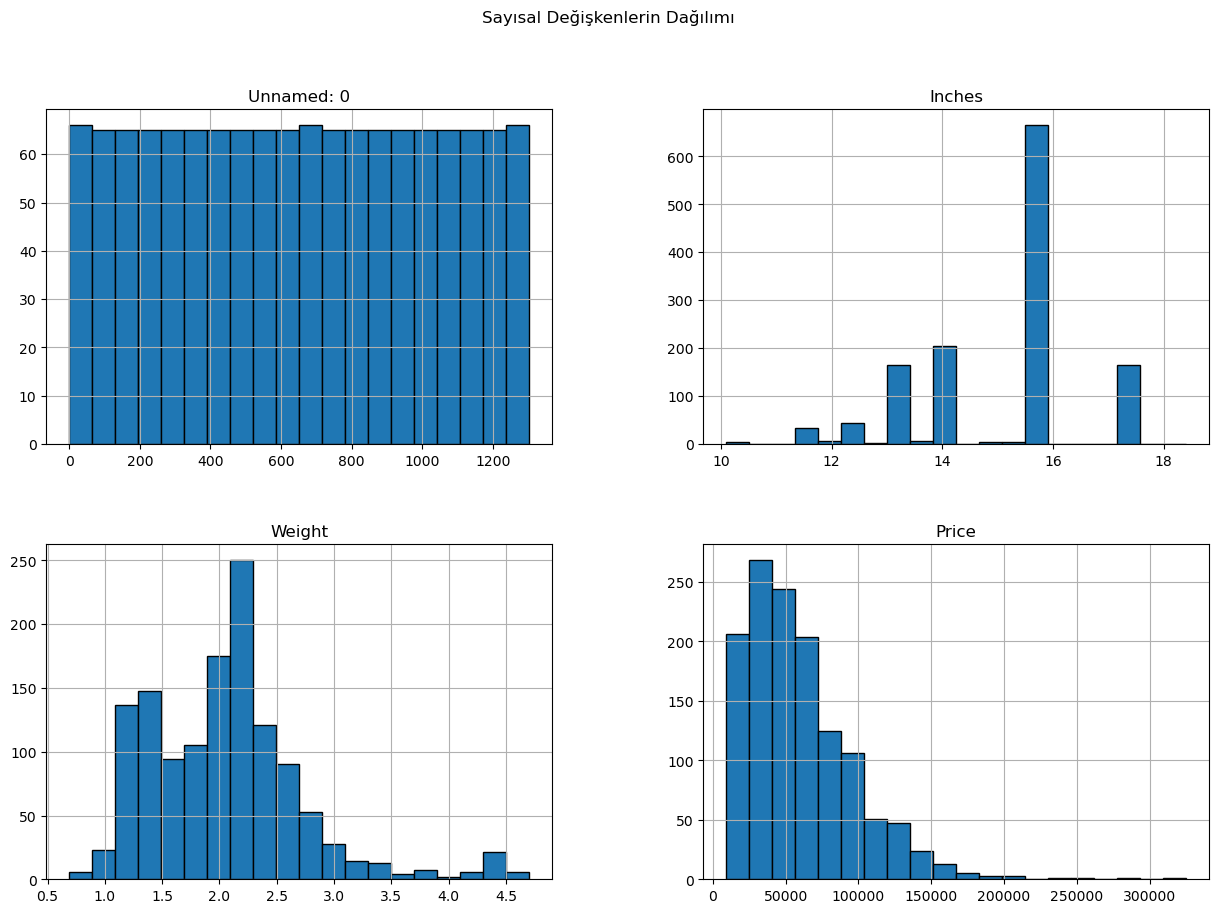

In [21]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Sayısal Değişkenlerin Dağılımı")
plt.show()

In [22]:
df["Ram"] = df["Ram"].astype(str)

In [23]:
df["New_Ram_Numeric"] = df["Ram"].str.replace("GB", "").astype(int)
print(df[["Ram", "New_Ram_Numeric"]].head())

    Ram  New_Ram_Numeric
0   8GB                8
1   8GB                8
2   8GB                8
3  16GB               16
4   8GB                8


In [24]:
Company_Group = {
    "Dell" : 1,
    "Lenovo" : 2,
    "HP" : 3,
    "Asus" : 4,
    "Acer" : 5,
    "MSI" : 6,
    "Toshiba" : 7,
    "Apple" : 8,
    "Samsung" : 9,
    "Razer" : 10,
    "Mediacom" : 11,
    "Microsoft" : 12,
    "Xiaomi" : 13,
    "Vero" : 14,
    "Chuwi" : 15,
    "Google" : 16,
    "Fujitsu" : 17,
    "LG" : 18,
    "Huawei" : 29
}
df["Company_Numeric"] = df["Company"].map(Company_Group)


In [25]:
TypeName_Group = {
    "Ultrabook": 1,
    "Notebook" : 2,
    "Netbook" : 3,
    "Gaming" : 4,
    "2 in 1 Convertible" : 5,
    "Workstation" : 6
}

df["TypeName_Numeric"] = df["TypeName"].map(TypeName_Group)

In [26]:
df["Weight"] = df["Weight"].astype(str).str.replace("kg", "").astype(float)

In [27]:
df[["Panel_Type", "Display_Type", "Resolution"]] = df["ScreenResolution"].str.extract(
    r"(IPS Panel)? ?(\w+ Display)? (\d+x\d+)?"
)

# Eksik değerleri dolduralım
df["Panel_Type"].fillna("Standard Panel", inplace=True)
df["Display_Type"].fillna("Standard Display", inplace=True)
df["Resolution"].fillna("0x0", inplace=True)

C:\Users\yusuf\AppData\Local\Temp\ipykernel_16708\424762824.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Panel_Type"].fillna("Standard Panel", inplace=True)
C:\Users\yusuf\AppData\Local\Temp\ipykernel_16708\424762824.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [28]:
df[["Res_Width", "Res_Height"]] = df["Resolution"].str.split("x", expand=True).astype(float)

In [29]:
# Eksik değerleri varsayılanlarla dolduralım
df[["Cpu_Brand", "Cpu_Model", "Cpu_Speed"]] = df["Cpu"].str.extract(r"(\w+) (\w+.*) (\d+\.\d+GHz)")
df["Cpu_Speed"] = df["Cpu_Speed"].str.replace("GHz", "").astype(float)

# Varsayılan değerler atayalım
df["Cpu_Brand"].fillna("Unknown", inplace=True)
df["Cpu_Model"].fillna("Unknown", inplace=True)
df["Cpu_Speed"].fillna(0.0, inplace=True)

C:\Users\yusuf\AppData\Local\Temp\ipykernel_16708\3777349387.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cpu_Brand"].fillna("Unknown", inplace=True)
C:\Users\yusuf\AppData\Local\Temp\ipykernel_16708\3777349387.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [30]:
Memory_Group = {
"256GB SSD":1,
"1TB HDD":2,
"500GB HDD":3,
"512GB SSD":4,
"128GB SSD +  1TB HDD":5,
"128GB SSD":6,
"256GB SSD +  1TB HDD":7,
"32GB Flash Storage":8,
"2TB HDD":9,
"64GB Flash Storage":10,
"512GB SSD +  1TB HDD":11,
"1TB SSD":12,
"256GB SSD +  2TB HDD":13,
"1.0TB Hybrid":14,
"256GB Flash Storage":15,
"16GB Flash Storage":16,
"32GB SSD":17,
"180GB SSD":18,
"128GB Flash Storage":19,
"512GB SSD +  2TB HDD":20,
"16GB SSD":21,
"512GB Flash Storage":22,
"1TB SSD +  1TB HDD":23,
"256GB SSD +  500GB HDD":24,
"128GB SSD +  2TB HDD":25,
"256GB SSD +  256GB SSD":26,
"512GB SSD +  256GB SSD":27,
"512GB SSD +  512GB SSD":28,
"64GB Flash Storage +  1TB HDD":29,
"1TB HDD +  1TB HDD":30,
"32GB HDD":31,
"64GB SSD":32,
"128GB HDD":33,
"240GB SSD":34,
"8GB SSD":35,
"508GB Hybrid":36,
"1.0TB HDD":37,
"512GB SSD +  1.0TB Hybrid":38,
"256GB SSD +  1.0TB Hybrid":39
}

df["Memory"] = df["Memory"].map(Memory_Group)

In [31]:
df[["Gpu_Brand", "Gpu_Model"]] = df["Gpu"].str.extract(r"(\w+) (.+)")

In [32]:
opsys_group = {
    "macOS": 1,
    "No OS": 2,
    "Windows 10": 3,
    "Linux": 4,
    "Chrome OS": 5,
    "Android": 6,
    "Windows 7" : 7,
    "Mac OS X" : 8,
    "Windows 10 S" : 9
}
df["OpSys_Numeric"] = df["OpSys"].map(opsys_group)

In [33]:
converted_columns = pd.DataFrame({
    "Numeric_Ram": df["New_Ram_Numeric"],
    "Company_Numeric": df["Company_Numeric"],
    "TypeName_Numeric": df["TypeName_Numeric"],
    "Inches": df["Inches"],
    "Weight": df["Weight"],
    "Memory" : df["Memory"] ,
    "OpSys_Numeric" : df["OpSys_Numeric"]
})

# Panel_Type, Display_Type ve Resolution sütunlarını ekleyelim
converted_columns[["Panel_Type", "Display_Type"]] = df[["Panel_Type", "Display_Type"]]
converted_columns[["Res_Width","Res_Height"]] = df[["Res_Width", "Res_Height"]]
converted_columns[["Gpu_Brand","Gpu_Model"]] = df[["Gpu_Brand", "Gpu_Model"]]
converted_columns[["Cpu_Brand","Cpu_Model","Cpu_Speed"]] = df[["Cpu_Brand","Cpu_Model","Cpu_Speed"]]

In [34]:
print(df["Cpu_Brand"].isna().sum())
print(converted_columns["Cpu_Brand"].isna().sum())

0
0


In [35]:
DisplayType_Group = {
    "Standard Display" : 1,
    "Retina Display" : 2
}

converted_columns["Display_Type"] = converted_columns["Display_Type"].map(DisplayType_Group)

In [36]:
Panel_Type_Group = {
    "Standard Panel" : 1,
    "IPS Panel" : 2
}

converted_columns["Panel_Type"] = converted_columns["Panel_Type"].map(Panel_Type_Group)

In [37]:
Gpu_Brand_Group = {
    "Intel" : 1,
    "Nvidia" : 2,
    "AMD" : 3,
    "ARM" : 4
}

converted_columns["Gpu_Brand"] = converted_columns["Gpu_Brand"].map(Gpu_Brand_Group)

In [38]:
# Gpu_Model'i parçalarına ayıralım
converted_columns[["Gpu_Brand", "Gpu_Series", "Gpu_Number"]] = converted_columns["Gpu_Model"].str.extract(r"(\w+) (\w+)? ?(\d+)?")

# Eksik değerleri "Unknown" ile dolduralım
converted_columns["Gpu_Series"].fillna("Unknown", inplace=True)
converted_columns["Gpu_Number"].fillna("0", inplace=True)  # Sayısal eksik değerleri '0' yapıyoruz

# Gpu_Series'i numaralandıralım
gpu_series_mapping = {series: idx for idx, series in enumerate(converted_columns["Gpu_Series"].unique(), start=1)}
converted_columns["Gpu_Series_Numeric"] = converted_columns["Gpu_Series"].map(gpu_series_mapping)

# Gpu_Number'ı sayısal değere dönüştürelim
converted_columns["Gpu_Number"] = converted_columns["Gpu_Number"].astype(int)

# Sonuçları kontrol edelim
converted_columns[["Gpu_Brand", "Gpu_Series", "Gpu_Series_Numeric", "Gpu_Number"]].head()


C:\Users\yusuf\AppData\Local\Temp\ipykernel_16708\410541638.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  converted_columns["Gpu_Series"].fillna("Unknown", inplace=True)
C:\Users\yusuf\AppData\Local\Temp\ipykernel_16708\410541638.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

,Gpu_Brand,Gpu_Series,Gpu_Series_Numeric,Gpu_Number
0,Iris,Plus,1,0
1,HD,Graphics,2,6000
2,HD,Graphics,2,620
3,Radeon,Pro,3,455
4,Iris,Plus,1,0


In [39]:
converted_columns["Cpu_Brand"].value_counts()

Cpu_Brand
Intel      1172
Unknown      86
AMD          44
Samsung       1
Name: count, dtype: int64

In [40]:
Cpu_Brand_Group = {
    "Intel": 1,
    "Unknown": 2,
    "AMD": 3,
    "Samsung": 4
}

converted_columns["Cpu_Brand"] = converted_columns["Cpu_Brand"].map(Cpu_Brand_Group)

In [41]:
# Cpu_Model'i parçalayalım: "Seri" ve "Model" olarak ayırıyoruz
converted_columns[["Cpu_Series", "Cpu_Model_Number"]] = converted_columns["Cpu_Model"].str.extract(r"(Core \w+|Ryzen \d+|Pentium|Celeron|Atom|Xeon|E-Series) ?(.+)?")

# Eksik değerleri dolduralım
converted_columns["Cpu_Series"].fillna("Unknown", inplace=True)
converted_columns["Cpu_Model_Number"].fillna("0", inplace=True)  # Sayısal eksikler için "0"

# Cpu_Series'i numaralandıralım
cpu_series_mapping = {series: idx for idx, series in enumerate(converted_columns["Cpu_Series"].unique(), start=1)}
converted_columns["Cpu_Series_Numeric"] = converted_columns["Cpu_Series"].map(cpu_series_mapping)

# Cpu_Model_Number'daki sayıları ayırarak işleyelim
converted_columns["Cpu_Model_Number"] = converted_columns["Cpu_Model_Number"].str.extract(r"(\d+)").fillna(0).astype(int)

# İşlemin sonuçlarını kontrol edelim
converted_columns[["Cpu_Series", "Cpu_Series_Numeric", "Cpu_Model_Number"]].head()


C:\Users\yusuf\AppData\Local\Temp\ipykernel_16708\2275938384.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  converted_columns["Cpu_Series"].fillna("Unknown", inplace=True)
C:\Users\yusuf\AppData\Local\Temp\ipykernel_16708\2275938384.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

,Cpu_Series,Cpu_Series_Numeric,Cpu_Model_Number
0,Core i5,1,0
1,Core i5,1,0
2,Core i5,1,7200
3,Core i7,2,0
4,Core i5,1,0


In [42]:
Gpu_Series_Group = {
"Graphics" : 1,
"GTX" : 2,
"R5" : 3,
"940MX" : 4,
"530" : 5,
"R7"  : 6,
"930MX" : 7,
"920MX" : 8,
"520" : 9,
"MX150" : 10,
"RX" : 11,
"Plus" : 12,
"M1200" : 13,
"R2" : 14,
"R4" : 15,
"MX130" : 16,
"920M" : 17,
"930M" : 18,
"M620" : 19,
"GT" : 20,
"M1000M" : 21,
"Pro" : 22,
"150MX" : 23,
"M2200M" : 24,
"W4190M" : 25,
"M2000M" : 26,
"M2200"  : 27,
"M520M"  : 28,
"R9" : 29,
"R3" :30,
"W6150M" : 31,
"3000M" : 32,
"920" : 33,
"M500M" : 34,
"M3000M" : 35,
"960M" : 36,
"940M" : 37,
"Unknown" : 38,
"GTX1060" : 39,
"540" : 40,
"620" : 41,
"M620M" : 42,
"GTX1050" : 43,
"GTX1080" : 44,
"W5130M"  : 45,
"980" : 46,
"T860" : 47 
}

converted_columns["Gpu_Series"] = converted_columns["Gpu_Series"].map(Gpu_Series_Group)

In [43]:
Cpu_Series_Group = {
    "Core i7" : 1,
    "Core i5" : 2,
    "Unknown" : 3,
    "Celeron" : 4,
    "Core i3" : 5,
    "Pentium" : 6,
    "Core M" : 7,
    "Atom" : 8,
    "E-Series" : 9,
    "Xeon" : 10,
    "Ryzen 1600" : 11
}

converted_columns["Cpu_Series"] = converted_columns["Cpu_Series"].map(Cpu_Series_Group)

In [44]:
converted_columns = converted_columns.drop('Gpu_Brand', axis=1)
converted_columns = converted_columns.drop('Gpu_Model', axis=1)
converted_columns = converted_columns.drop('Cpu_Model', axis=1)

In [45]:
converted_columns.info()
converted_columns.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Numeric_Ram         1303 non-null   int32  
 1   Company_Numeric     1303 non-null   int64  
 2   TypeName_Numeric    1303 non-null   int64  
 3   Inches              1303 non-null   float64
 4   Weight              1303 non-null   float64
 5   Memory              1303 non-null   int64  
 6   OpSys_Numeric       1303 non-null   int64  
 7   Panel_Type          1303 non-null   int64  
 8   Display_Type        1303 non-null   int64  
 9   Res_Width           1303 non-null   float64
 10  Res_Height          1303 non-null   float64
 11  Cpu_Brand           1303 non-null   int64  
 12  Cpu_Speed           1303 non-null   float64
 13  Gpu_Series          1303 non-null   int64  
 14  Gpu_Number          1303 non-null   int32  
 15  Gpu_Series_Numeric  1303 non-null   int64  
 16  Cpu_Se

,Numeric_Ram,Company_Numeric,TypeName_Numeric,Inches,Weight,Memory,OpSys_Numeric,Panel_Type,Display_Type,Res_Width,Res_Height,Cpu_Brand,Cpu_Speed,Gpu_Series,Gpu_Number,Gpu_Series_Numeric,Cpu_Series,Cpu_Model_Number,Cpu_Series_Numeric
0,8,8,1,13.3,1.37,6,1,2,2,2560.0,1600.0,1,2.3,12,0,1,2,0,1
1,8,8,1,13.3,1.34,19,1,1,1,0.0,0.0,1,1.8,1,6000,2,2,0,1
2,8,3,2,15.6,1.86,1,2,1,1,0.0,0.0,1,2.5,1,620,2,2,7200,1
3,16,8,1,15.4,1.83,4,1,2,2,2880.0,1800.0,1,2.7,22,455,3,1,0,2
4,8,8,1,13.3,1.37,1,1,2,2,2560.0,1600.0,1,3.1,12,0,1,2,0,1


In [46]:
x=converted_columns[['Numeric_Ram','Company_Numeric','TypeName_Numeric','Inches','Weight','Memory','OpSys_Numeric','Panel_Type','Display_Type','Res_Width','Res_Height','Cpu_Speed','Gpu_Series','Gpu_Number','Gpu_Series_Numeric','Cpu_Series','Cpu_Model_Number','Cpu_Series_Numeric']]
y=df[["Price"]]

In [47]:
print(converted_columns["Cpu_Brand"].isna().sum())
#86 ikisi

0


In [48]:
x.shape, y.shape

((1303, 18), (1303, 1))

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1042, 18), (261, 18), (1042, 1), (261, 1))

In [50]:
from sklearn.metrics import r2_score, mean_squared_error

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(x_train, y_train)

LinearRegression()

In [54]:
tahmin = lr.predict(x_test)

In [55]:
r2_score(y_test, tahmin)

0.5989180156089029

In [56]:
mean_squared_error(y_test, tahmin) ** 0.5

24048.126078873807

In [57]:
residuals = y_test-tahmin

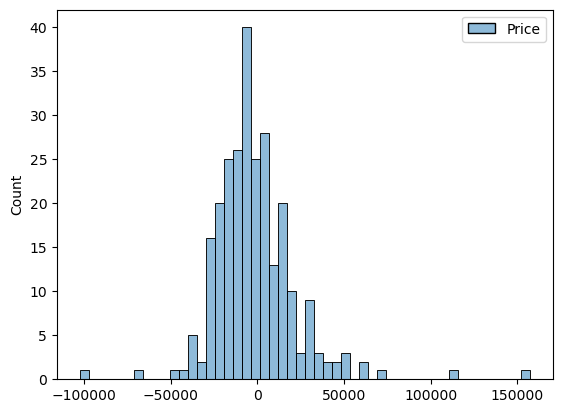

In [58]:
sns.histplot(residuals, bins=50);

<Axes: xlabel='Price', ylabel='Density'>

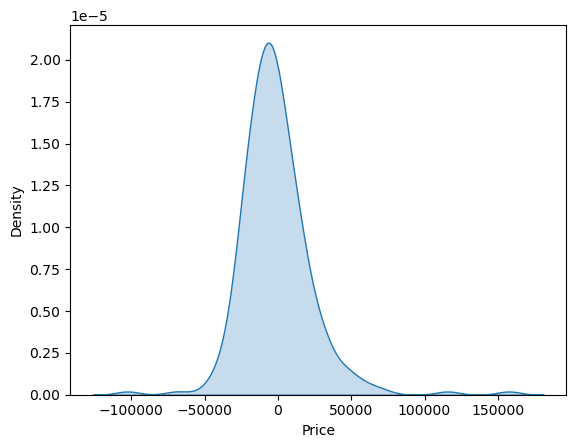

In [59]:
sns.kdeplot(x=residuals["Price"], fill=True)

In [60]:
from sklearn.linear_model import Ridge

In [61]:
r = Ridge()
model = r.fit(x_train, y_train)
tahmin = model.predict(x_test)

In [62]:
r2_score(y_test, tahmin)

0.5989656199572303

In [63]:
mean_squared_error(y_test, tahmin) ** .5

24046.69890265306

In [64]:
from sklearn.linear_model import Lasso

In [65]:
l = Lasso(max_iter=10000)  # max_iter'ı arttırarak daha fazla iterasyon sağlıyoruz
model = l.fit(x_train, y_train)
tahmin = model.predict(x_test)

In [66]:
r2_score(y_test, tahmin)

0.5989010918947235

In [67]:
mean_squared_error(y_test, tahmin) ** .5

24048.633430656053

In [68]:
from sklearn.linear_model import ElasticNet

In [69]:
e = ElasticNet(max_iter=10000)
model = e.fit(x_train, y_train)
tahmin = model.predict(x_test)

In [70]:
r2_score(y_test, tahmin)

0.602262923383025

In [71]:
mean_squared_error(y_test, tahmin) ** .5

23947.638922870898

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
dt = DecisionTreeRegressor()
model = dt.fit(x_train, y_train)
tahmin = model.predict(x_test)

In [74]:
r2_score(y_test, tahmin)

0.731766791574265

In [75]:
mean_squared_error(y_test, tahmin) ** .5

19666.221887153963

In [76]:
from sklearn.ensemble import ExtraTreesRegressor

In [77]:
# y_train'i numpy array'e dönüştürüp düzleştir
y_train = y_train.values.ravel()

# Modeli tekrar eğit
et = ExtraTreesRegressor()
model = et.fit(x_train, y_train)
tahmin = model.predict(x_test)

In [78]:
r2_score(y_test, tahmin)

0.8093507421348277

In [79]:
mean_squared_error(y_test, tahmin) ** .5

16579.9120396742

In [80]:
from sklearn import svm

In [81]:
sv = svm.SVR()
sv.fit(x_train, y_train)
tahmin = sv.predict(x_test)

In [82]:
r2_score(y_test, tahmin)

-0.028946736639797965

In [83]:
mean_squared_error(y_test, tahmin) ** .5

38517.76770958527

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import svm
import numpy as np

def model_test(x, y):
    lr=LinearRegression()
    r =Ridge()
    l =Lasso()
    en= ElasticNet()
    dt=DecisionTreeRegressor()
    et=ExtraTreesRegressor()
    sv=svm.SVR()
    
    modeller=[lr, r, l, en, dt, et, sv]
    model_isimler=["Linear Regression", "Ridge", "Lasso", "Elastic Net", "Decision Tree", "Extra Trees", "Support Vector Machine"]
    r2ler = []
    rmseler = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
    
    for model in modeller:
        model.fit(x_train, y_train)
        tahmin = model.predict(x_test)
        r2ler.append(np.round(r2_score(y_test, tahmin)*100,2))
        rmseler.append(np.round(mean_squared_error(y_test, tahmin) ** .5,2))

    sonuc={"Model":model_isimler, "R2 Skor":r2ler, "RMSE":rmseler}
    sonuc=pd.DataFrame(sonuc)
    sonuc=sonuc.sort_values(by="R2 Skor", ascending=False)
    return sonuc

In [85]:
model_test(x, y)

C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.434e+11, tolerance: 1.429e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.599e+11, tolerance: 1.429e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\yusuf\anaconda3\Lib

,Model,R2 Skor,RMSE
5,Extra Trees,82.24,16000.66
4,Decision Tree,72.92,19759.27
3,Elastic Net,60.23,23947.24
1,Ridge,59.90,24046.70
0,Linear Regression,59.89,24048.13
2,Lasso,59.89,24048.17
6,Support Vector Machine,-2.89,38517.77
